In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covid.csv')

In [3]:
active_cases_column = 'Active'
population_column = 'Population'
state_column = 'States'

In [4]:
df['Active Case Rate per Million'] = (df[active_cases_column] / df[population_column]) * 1000000

In [5]:
df_sorted = df.sort_values(by='Active Case Rate per Million', ascending=False)

In [6]:
print(df_sorted.head(5))

           States  Population  Total Cases  Active  Discharged  Deaths  \
16         Punjab    30501026      7936371   12291      773070   19338   
1          Kerala    34968876     69071283   10076    68341759   71946   
30         Sikkim      658019       448873      83       44379     500   
26        Tripura     4184959      1084623     442     1074771     941   
5   Uttar Pradesh    11700099     21454151     601     2121648   23707   

   Active Ratio Discharge Ratio Death Ratio  Active Case Rate per Million  
16        0.15%          97.41%       2.44%                    402.970051  
1         0.01%          98.94%       1.04%                    288.141947  
30        0.02%          98.87%       1.11%                    126.136175  
26        0.04%          99.09%       0.87%                    105.616327  
5         0.00%          98.89%       1.11%                     51.367087  


In [7]:
gdf = gpd.read_file('india_state.geojson')

In [8]:
merged_gdf = gdf.merge(df, left_on='NAME_1', right_on=state_column)

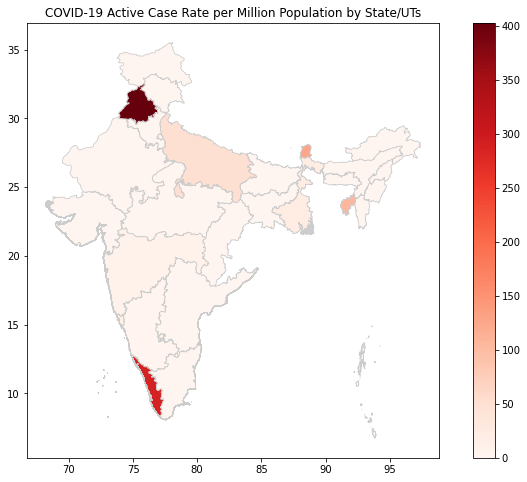

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('COVID-19 Active Case Rate per Million Population by State/UTs')
merged_gdf.plot(column='Active Case Rate per Million', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()